In [35]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\pedro\Desktop\Pastas\Faculdade\Faculdade-6ano\CIENCIA DE DADOS\dataset\vgsales.csv'
df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(None,
    Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  )

Acurácia média da Árvore de Decisão: 0.15791085028130405
Acurácia média do KNN: 0.16375264878052223


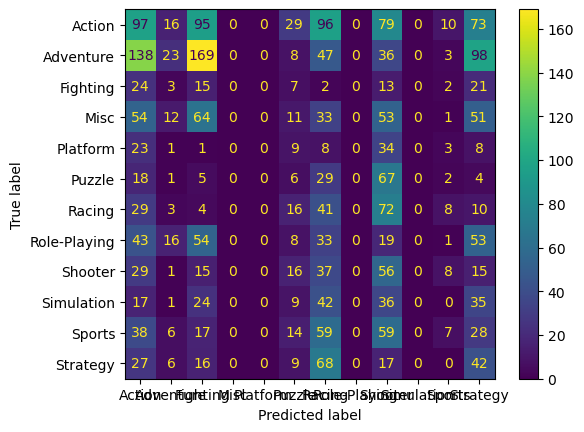

In [37]:


# Definir KFold com 6 divisões
kf = KFold(n_splits=6)

# Modelos
model_tree = tree.DecisionTreeClassifier(criterion='entropy')
model_knn = KNeighborsClassifier(n_neighbors=3)

# Para armazenar acurácias e matrizes de confusão
accuracies_tree = []
accuracies_knn = []
conf_matrices_tree = []
conf_matrices_knn = []

# Loop manual com KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar e testar Decision Tree
    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_test)
    accuracies_tree.append(accuracy_score(y_test, y_pred_tree))
    conf_matrices_tree.append(confusion_matrix(y_test, y_pred_tree))

    # Treinar e testar KNN
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    accuracies_knn.append(accuracy_score(y_test, y_pred_knn))
    conf_matrices_knn.append(confusion_matrix(y_test, y_pred_knn))

# Exibir as acurácias médias
print('Acurácia média da Árvore de Decisão:', np.mean(accuracies_tree))
print('Acurácia média do KNN:', np.mean(accuracies_knn))

# Exibir uma das matrizes de confusão (da última iteração)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrices_tree[-1], display_labels=np.unique(y))
disp.plot()
plt.show()